This notebook goes over some miscellaneous Python stuff that wasn't covered in the previous notebooks but which is still quite useful to know. It is listed in order of usefulness. If you're new to Python, make sure to read this over before doing the exercises.

# Gotcha: multiple names pointing to the same data

In Python when you assign a name to a data structure that already has a name, assume that both names will point to the same data structure. This is important because if you manipulate the data using one name, the other name will retrieve the manipulated data.

For example:

In [1]:
import numpy as np

x = np.arange(10)
y = x

print(x)
print(y)

# manipulate x
x[3] = -1

# show y and x
print('')
print(x)
print(y)

# notice that both x and y have been manipulated

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]

[ 0  1  2 -1  4  5  6  7  8  9]
[ 0  1  2 -1  4  5  6  7  8  9]


In [2]:
# this happens with most variable types, but in addition to np arrays
# you are most likely to run into this with lists and dicts, e.g.

x = ['a', 'b', 'c', 'd']
y = x
print(x)
print(y)

x[2] = 'z'

print('')
print(x)
print(y)

x = {'a': 1, 'b': 2, 'c': 3}
y = x

print('')
print(x)
print(y)

x['b'] = 100

print('')
print(x)
print(y)

['a', 'b', 'c', 'd']
['a', 'b', 'c', 'd']

['a', 'b', 'z', 'd']
['a', 'b', 'z', 'd']

{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}

{'a': 1, 'b': 100, 'c': 3}
{'a': 1, 'b': 100, 'c': 3}


Take-home message: if your code isn't doing what it should be but isn't crashing, make sure you're not accidentally manipulating an array/list/dict using one name and accessing it with another under the assumption it wasn't manipulated.

To make variable names point to independent copies of the same data that can be manipulated independently, do the following:

In [3]:
# I like to just put this line at the top of every notebook under the imports
from copy import deepcopy as copy

In [4]:
import numpy as np

x = np.arange(10)
y = copy(x)

print(x)
print(y)

# manipulate x
x[3] = -1

# show y and x
print('')
print(x)
print(y)

# notice that now only x has been manipulated

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]

[ 0  1  2 -1  4  5  6  7  8  9]
[0 1 2 3 4 5 6 7 8 9]


In [5]:
# and with lists/dicts

## list example
x = ['a', 'b', 'c', 'd']
y = copy(x)
print(x)
print(y)

x[2] = 'z'

print('')
print(x)
print(y)

# only x has been manipulated

['a', 'b', 'c', 'd']
['a', 'b', 'c', 'd']

['a', 'b', 'z', 'd']
['a', 'b', 'c', 'd']


In [6]:
## dict example
x = {'a': 1, 'b': 2, 'c': 3}
y = copy(x)

print(x)
print(y)

x['b'] = 100

print('')
print(x)
print(y)

# only x has been manipulated

{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}

{'a': 1, 'b': 100, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}


# Tip: indexing arrays and lists with negative numbers

In [7]:
# you can index lists from the end as well
x = ['a', 'b', 'c', 'd']

print(x[-1])  # last element
print(x[-2])  # second to last elemnet
print(x[1:-1])  # sublist from 1 (inclusive) to last element (exclusive)

d
c
['b', 'c']


In [8]:
# works for arrays too
x = np.array([1, 1, 2, 3, 5, 8, 13])

print(x[-1])
print(x[-2])
print(x[1:-1])

13
8
[1 2 3 5 8]


In [9]:
# you can also reverse a list/array quick using this little trick
x_reversed = x[::-1]
print(x)
print(x_reversed)

[ 1  1  2  3  5  8 13]
[13  8  5  3  2  1  1]


# Gotcha: multi-dimensional selection in numpy arrays with logical masks

If two logical masks are used to index two different dimensions of a numpy array, numpy will attempt to return their intersection, not their outer product:

In [10]:
x = np.arange(25).reshape(5, 5)

print(x)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [11]:
mask_0 = [False, True, False, True, True]
mask_1 = [True, False, True, True, False]

print(x[mask_0, mask_1])
print('')

# how is that different from the following?
print(x[mask_0, :][:, mask_1])

[ 5 17 23]

[[ 5  7  8]
 [15 17 18]
 [20 22 23]]


# Tip: assert statements
Assert statements can be useful to perform sanity checks in a code block, e.g.:

In [12]:
def calc_sqrt(x):
    """Calculate square root of a number."""
    
    assert x > 0, 'x must be positive!'
    
    return np.sqrt(x)

print(calc_sqrt(3))
print(calc_sqrt(4))
print(calc_sqrt(-1))

1.7320508075688772
2.0


AssertionError: x must be positive!

# Tip: running scripts
You don't have to run Python code from within a Jupyter notebook. You can also write a Python script and run it from the command line. For example, from the Jupyter homepage, select New-->Terminal, and type

`python test_script.py`

and hit Enter to run the script `test_script.py`.

For practical purposes, usually most scientific code works just fine in a Jupyter notebook, but sometimes running scripts is useful too.

# Tip: comment blocks

You can write blocks of comments by enclosing the block with triple quotes on either end:

In [13]:
x = 5
"""
This is a comment block.
Nothing in here is read by the interpreter.

They're often used to describe the behavior of a function just below the function
definition, in which case they're called a "docstring" (documentation string).

For example, the function calc_v_rev in neuro.py has a short docstring attached to it.
"""
print(x)

5


# Tip: working with CSV files and pandas

CSV (comma separated value) files are very useful for storing data because they can be read by both humans and computers with relative ease.

Data in CSV files is typically stored in columns, with the first line containing the column titles. Open up the file `example.csv` to take a look.

We usually work with CSV files using the library `pandas`, which is built around a data structure called a data frame.

In [14]:
import pandas as pd

df = pd.read_csv('example.csv')
df

,x,y,z
0,0.000000,-0.024237,0.384786
1,0.010101,-0.562092,0.171377
2,0.020202,-0.234228,0.088689
3,0.030303,-1.117655,0.219866
4,0.040404,-1.467024,0.741885
5,0.050505,0.276765,0.831853
6,0.060606,-0.618979,0.660646
7,0.070707,-0.652356,0.161780
8,0.080808,-1.256188,0.426599
9,0.090909,-0.300851,0.530083


Text(0,0.5,'y')

/home/melete/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


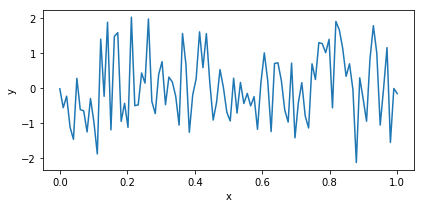

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

# data in a dataframe is referenced by column and easily be plotted
x = df['x']
y = df['y']

fig, ax = plt.subplots(1, 1, figsize=(6, 3), tight_layout=True)
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [16]:
# dataframes also have a lot of built-in functions
print(df.mean())
print('')
print(df.std())

x    0.500000
y    0.026694
z    0.502765
dtype: float64

x    0.293045
y    0.963959
z    0.289085
dtype: float64


In [17]:
import numpy as np

# we can create a new data frame like this
a = np.linspace(0, 1, 10)
b = np.random.uniform(0, 1, 10)

df = pd.DataFrame(data={'a': a, 'b': b}, columns=['a', 'b'])
df

,a,b
0,0.000000,0.833356
1,0.111111,0.413756
2,0.222222,0.718868
3,0.333333,0.465687
4,0.444444,0.969892
5,0.555556,0.317305
6,0.666667,0.381529
7,0.777778,0.237047
8,0.888889,0.258049
9,1.000000,0.198592


Note: the first column is called the index, and is essentially just a way of referencing rows.

In [18]:
# you can reference the data in a given row as follows
df.loc[3]

a    0.333333
b    0.465687
Name: 3, dtype: float64

In [19]:
df.loc[3:7]

,a,b
3,0.333333,0.465687
4,0.444444,0.969892
5,0.555556,0.317305
6,0.666667,0.381529
7,0.777778,0.237047


In [20]:
# we can save our data frame like this
df.to_csv('my_new_data.csv', index=False)  # index=False prevents the index col from being saved

# now take a look at the file my_new_data.csv 

Check out this tutorial if you want to learn more about using pandas.

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

# Tip: List comprehensions

In [21]:
# there's a specific "Pythonic" short-hand for making simple lists in one line that can be useful
# these are called "list comprehensions"
# Example:

my_list = []

for ctr in range(10):
    my_list.append(ctr ** 2)
    
# can be replaced by simply
my_list = [ctr**2 for ctr in range(10)]

# the last bit (range(10)) is the thing you're looping over
# the middle bit (ctr) is the name of the counter variable
# the first bit (ctr ** 2) is expression to create each list element from the counter variable

print(my_list)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


# Tip: renaming functions

In [22]:
# Everything in Python is an "object", including functions. 
# This means you can rename them, which can be convenient. Example
x = [0, 1, 2]
y = [9, 10, 11]

z = np.concatenate([x, y])
print(z)

cc = np.concatenate
z = cc([x, y])
print(z)

[ 0  1  2  9 10 11]
[ 0  1  2  9 10 11]


# Tip: chaining object methods together

Python "objects" have "methods" attached, which serve as an alternative to calling functions with those object as input. What's nice is that such methods can be chained together. For example:

In [23]:
x = np.random.normal(0, 1, (5, 5))

print(x)
print('')

x_std_row = x.std(axis=0)

print(x_std_row)
print('')

x_mean_std =x.std(axis=0).mean()

print(x_mean_std)

[[ 0.83329075 -0.25185881  1.41449845 -0.64975098 -0.55806973]
 [ 0.04747542  1.0389245   1.229421   -0.54531668  1.2727507 ]
 [ 1.16848675  1.76734645 -1.29096261 -1.31550241  0.83296408]
 [-0.54704444 -0.30288293  1.12754838 -1.22283898 -0.31325156]
 [-0.04164277  0.55579783 -1.21509481 -0.25968351  0.94924044]]

[0.62230699 0.78622424 1.23340459 0.40593257 0.73084853]

0.7557433837053148


# Tip: plotting

`matplotlib` is very flexible, but the plotting commands are often lengthy and complicated.

If you want to make a specific plot component (e.g. histogram, heatmap, colorbar, etc), check out the examples in the [matplotlib gallery](https://matplotlib.org/gallery.html) to see how they're made.

# Tip: setting figure panel font sizes

Feel free to use the following function to resize all basic text elements on a plot.

In [24]:
def set_font_size(ax, font_size, legend_font_size=None):
    """Set font_size of all axis text objects to specified value."""

    texts = [ax.title, ax.xaxis.label, ax.yaxis.label] + \
        ax.get_xticklabels() + ax.get_yticklabels()

    for text in texts:
        text.set_fontsize(font_size)

    if ax.get_legend():
        if not legend_font_size:
            legend_font_size = font_size
        for text in ax.get_legend().get_texts():
            text.set_fontsize(legend_font_size)

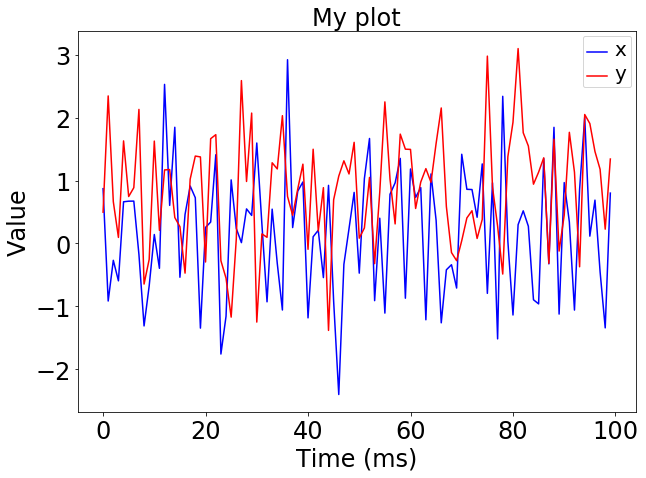

In [25]:
# example usage
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(np.random.normal(0, 1, 100), c='b')
ax.plot(np.random.normal(1, 1, 100), c='r')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Value')
ax.set_title('My plot')
ax.legend(['x', 'y'])

set_font_size(ax, 24, legend_font_size=20)

# Best practices

There are a lot of good practices that will improve your scientific coding experience.

# Best practice: Variable naming

Use concise but unambiguous variable names. For example `ctr` is a good name for a for-loop counter.

`neurs` or `nrns` could be a good name for a list of neurons, with `neur` or `nrn` referencing a specific individual.

# Best practice: Write code incrementally

Test each little bit of your code after you write it. If you only test it's completely written it can be much harder to identify the sources of errors.

# Best practice: Validate your code

Ideally before jumping to conclusions based on its results.

It's unfortunately common for code to run without throwing errors but to still not do what you want it to.

The best ways of validating your code efficiently are:

1. Inspecting your code, i.e. literally re-reading it line-by-line. This has been shown to catch a huge number of errors and doesn't add any extra moving parts.
2. Test your code using scientific controls. If your function is quantifying some property of a simulation result, for instance, test it on mock simulation results that have known values of that property before testing it on your real simulation result.
3. If there's not an obvious way to test your code with scientific controls, test each of its main components independently first.

# Best practice: Keep a sandbox notebook for messing around

Sometimes you just need to fool around with a code block to get it working correctly, or to see how a specific function works. I find it useful to have a notebook called `sandbox` for just this purposes. And once I'm done with it I let it be washed away by the sea.

# Best practice: Read the error messages

While these don't always explain exactly what's going wrong, they often do, so read through them first to try to get an idea of what's wrong!

# Best practice: Look stuff up online

Most operations you'll need have already been implemented in Python. The best way to figure out how to use them is to look them up on Google!

A secret among coders is that most people who are good at coding are essentially just good at looking up answers on the internet

# Best practice: Test out functions from known libraries before using them

It's not always clear exactly how a function has been implemented, e.g. what order the arguments are in. Make sure to test a new function on example cases with known input-output pairs so you know exactly how it works before incorporating it into your scientific code.

# Best practice: Debug with pdb

There's a great little debugging tool called pdb, if you want to spend a few minutes learning it. It works within Jupyter and can be very useful for exploring what's derailing your code exactly where it's being derailed. 

Use the command "l" to show where you're at, "n" to run the next line, "q" to quit, etc.

More details here: https://docs.python.org/3/library/pdb.html.

`import pdb; pdb.set_trace()` is your friend.

`pdb.pm()` is your other friend.

# Best practice: define goals and make plans

It often helps to develop a very clear picture of the code you're trying to write before beginning to write it. One concrete example is by identifying exactly what a function will take as input and return as output before writing the guts of the function.

More generally, if your code might get a little complicated, planning out how you're going to organize ahead of time, through diagrams or pseudocode, for example, can save you plenty of time in the long run.